# Time delay plots
As shown in the overleaf document, the time delay experimented by some image at image position $\theta$ and source position $\beta$ is given by:

\begin{align*}
t_d = 4M_L \left[\frac{1}{2}\left(\frac{\theta}{\theta_E} - \frac{\beta}{\theta_E}\right)^2 - \ln\left(\frac{\theta}{\theta_E}\right)\right] + \text{const}
\end{align*}
where the remaining constants are independent of $\beta$ and $\theta$, so they are experienced by all images equally and full degenerate.

Furthermore, for a point mass lens, we can relate the image position and source position by:

\begin{align*}
\theta_\pm/\theta_E =  \frac{\beta/\theta_E \pm \sqrt{(\beta/\theta_E)^2 + 4}}{2}
\end{align*}

Now we may consider the time delay changes when the lens is moving. Physically, this is the same as the source position moving.

In particular, the motion of the lens can be characterized by the following:
$\beta = \sqrt{\beta_\text{min}^2  + \ell^2}$
where $\ell^2$ is the angular displacement of the lens.

Note that for the case of point mass lens the images are always along the image-source line, so we are justified to just treat the image displacements as signed number and add/subtract them directly for the calculation of time delay.

## Derivative of time delay plot
Now we want to consider the case when the lens (or source) moves by an angular displacement $\ell$ along a straightline. Since the time delay above is parameterized by $\ell$ (i.e. $t(\ell)$, we can simply compute $dt/d\ell$, we argue that this is the same as the doppler shift, up to an angular velocity. To see that, we compute the derivative:
\begin{align*}
\frac{d}{d(\ell/\theta_E)} \left[\frac{t_d}{4M_L}\right] &= \frac{d(\vec{\theta}/\theta_E)}{d(\ell/\theta_E)}\cdot\nabla_{\vec{\theta/\theta_E}} t_d + \frac{d(\vec{\beta}/\theta_E)}{d(\ell/\theta_E)} \cdot \nabla_{\vec{\beta}/\theta_E} t_d\\
&= -  \left(\frac{\vec{\theta}}{\theta_E} - \frac{\vec{\beta}}{\theta_E}\right) \cdot \frac{d(\vec{\beta}/\theta_E)}{d(\ell/\theta_E)}
\end{align*}


## Relationship with frequency shift in doppler lensing
Recall the redshift in doppler lensing is $$z=-\frac{D_L D_S}{D_{LS}}(\vec{\theta}-\vec{\beta}) \cdot \frac{d\vec{\beta}}{dt} = -\left(\frac{\vec{\theta}}{\theta_E} - \frac{\vec{\beta}}{\theta_E}\right) \cdot \frac{d(\vec{\beta}/\theta_E)}{d(t/4M_L)}$$
Compare it with the expression above, we see that it differ only by a rate of change and a negative sign. The negative sign make sense because if time delay increase with time, successive wavefronts will be separated by a time $T_{sep} > T_{period}$, hence a redshift will be induced.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [36]:
image_pos(1000)

(1000.000999999, -0.0009999989999869285)

In [61]:
time_delay(-0.0009,1000)
time_delay(10,10)
#get_ell

-2.302585092994046

In [62]:
def image_pos(beta):
    """Get image position"""
    k = np.sqrt(beta*beta + 4)
    return 0.5*(beta+k), 0.5*(beta-k)

In [64]:
def time_delay(theta, beta):
    """Get time delay in $M_L unit"""
    return 0.5*(theta-beta)**2 - np.log(np.abs(theta)) +2

In [65]:
def pml_time_delay(beta):
    im_plus, im_minus = image_pos(beta)
    return time_delay(im_plus,beta), time_delay(im_minus,beta)

In [66]:
def get_ell(beta_min,res=500):
    """Get ell from -5*beta_min to 5*beta_min"""
    return np.linspace(-5,5,res) 

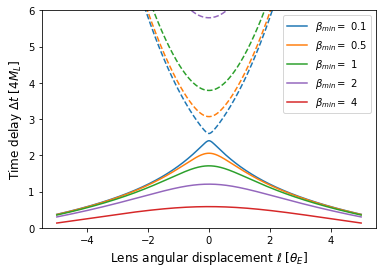

In [69]:
with PdfPages('./time-delay-pm-lens.pdf') as pdf:
    # Plot the time delays
    beta_mins = [0.1,0.5,1,2,4]
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red']
    for beta_min,color in zip(beta_mins,colors):
        ell = get_ell(beta_min)
        betas = np.sqrt(beta_min*beta_min + ell*ell)
        pm_image, mn_image = pml_time_delay(betas)
        plt.plot(ell,pm_image,color=color,ls='-',label=r'$\beta_{min}=$ '+ str(beta_min))
        plt.plot(ell,mn_image,color=color,ls='--')
    plt.ylim(0,6)
    plt.legend()
    plt.ylabel(R'Time delay $\Delta t$ [$4 M_L$]',fontsize=12)
    plt.xlabel(r'Lens angular displacement $\ell$ [$\theta_E$]',fontsize=12)
    pdf.savefig(bbox_inches='tight')

Text(0.5, 0, 'Image displacement $\\ell$ [$\\theta_E$]')

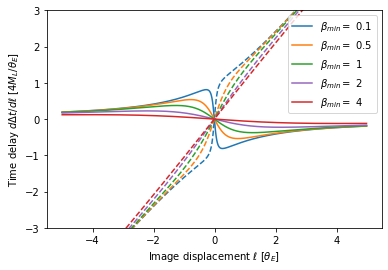

In [68]:
## Plot the derivative of time delay with theta
# Plot the time delays
beta_mins = [0.1,0.5,1,2,4]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red']
for beta_min,color in zip(beta_mins,colors):
    ell = get_ell(beta_min)
    dell = np.diff(ell)
    betas = np.sqrt(beta_min*beta_min + ell*ell)
    pm_image, mn_image = pml_time_delay(betas)
    dpm_img_dell, dmn_img_dell = np.diff(pm_image)/dell, np.diff(mn_image)/dell
    plt.plot(ell[:-1],dpm_img_dell,color=color,ls='-',label=r'$\beta_{min}=$ '+ str(beta_min))
    plt.plot(ell[:-1],dmn_img_dell,color=color,ls='--')
plt.ylim(-3,3)
plt.legend()
plt.ylabel(R'Time delay $d\Delta t/d\ell $ [$4M_L/\theta_E$]')
plt.xlabel(r'Image displacement $\ell$ [$\theta_E$]')

In [18]:
beta_min0 = 0.1
ell = get_ell(beta_min0)
betas = np.sqrt(beta_min0*beta_min0 + ell*ell)

In [8]:
pm_image, mn_image = pml_time_delay(betas)

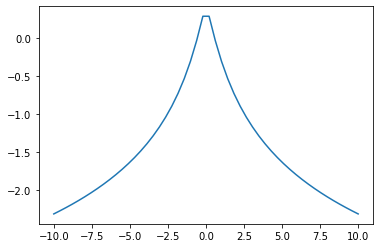

In [9]:
plt.plot(ell,pm_image)
#plt.plot(ell,mn_image)
#plt.yscale('log')

Text(0.5, 0, 'Image displacement $\\ell/ \\theta_E$')

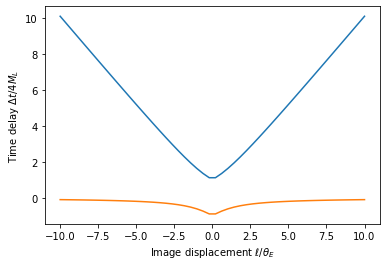

In [13]:
plt.plot(ell,image_pos(betas)[0])
plt.plot(ell,image_pos(betas)[1])
plt.ylabel(R'Time delay $\Delta t/4 M_L$')
plt.xlabel(r'Image displacement $\ell/ \theta_E$')

## Timing order of estimates
$$
t_E = \text{164/365.5 years} \left(\frac{M_L}{100 M_{\odot}}\right)^{1/2} \left(\frac{D}{1 kpc}\right)^{1/2} \left(\frac{v}{300 km/s}\right)^{-1}
$$

In [15]:
def D_fixed_tE(Ml,tE, v):
    return ((365.25/164)*tE*(Ml/100)**(-0.5)*(v/300))**2

In [22]:
Ml = np.logspace(0,5)

Text(0.5, 1.0, 'Einstein Crossing Time $t_E$ (Fix $v$=300 km/s)')

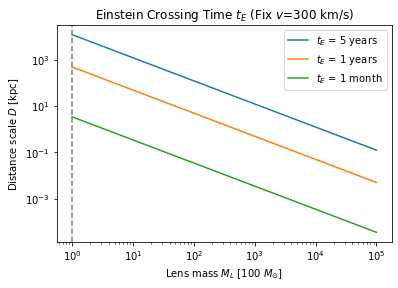

In [39]:
plt.loglog(Ml,D_fixed_tE(Ml,5,300),label=r'$t_E$ = 5 years')
plt.loglog(Ml,D_fixed_tE(Ml,1,300),label=r'$t_E$ = 1 years')
plt.loglog(Ml,D_fixed_tE(Ml,1/12,300),label=r'$t_E$ = 1 month')
plt.ylabel(r'Distance scale $D$ [kpc]')
plt.xlabel(r'Lens mass $M_L$ [100 $M_{\odot}$]')
plt.axvline(1,color='grey',ls='--')
plt.legend()
plt.title('Einstein Crossing Time $t_E$ (Fix $v$=300 km/s)')